# Scrape Attorneys with Selenium and Beautiful Soup – Part 1
In this project I will demonstrate how to scrape the email addresses for attorneys in a particular geographical area using the [California Bar Association (CalBar) website](https://www.calbar.ca.gov/). This is a multi-part project. In the first part, we'll search for attorneys in specific zip codes using CalBar's advanced search. Then, we'll scrape these attorney listings as well as their individual CalBar webpages to extract each attorney's email address.

In [ ]:
import re
import os
import time
import string
import random
import asyncio
import requests
import zipcodes
import itertools
import pandas as pd
import multiprocessing
from pprint import pprint
from bs4 import BeautifulSoup
from PyPDF2 import PdfFileReader
from fake_useragent import UserAgent
from requests_html import HTMLSession
from requests_html import AsyncHTMLSession

First, let's extract the list of all zip codes for San Diego county from the CalBar website. They have a [demographics search feature](https://apps.calbar.ca.gov/members/demographics_search.aspx) that lists the number of attorneys for a particular county by zip code or city.

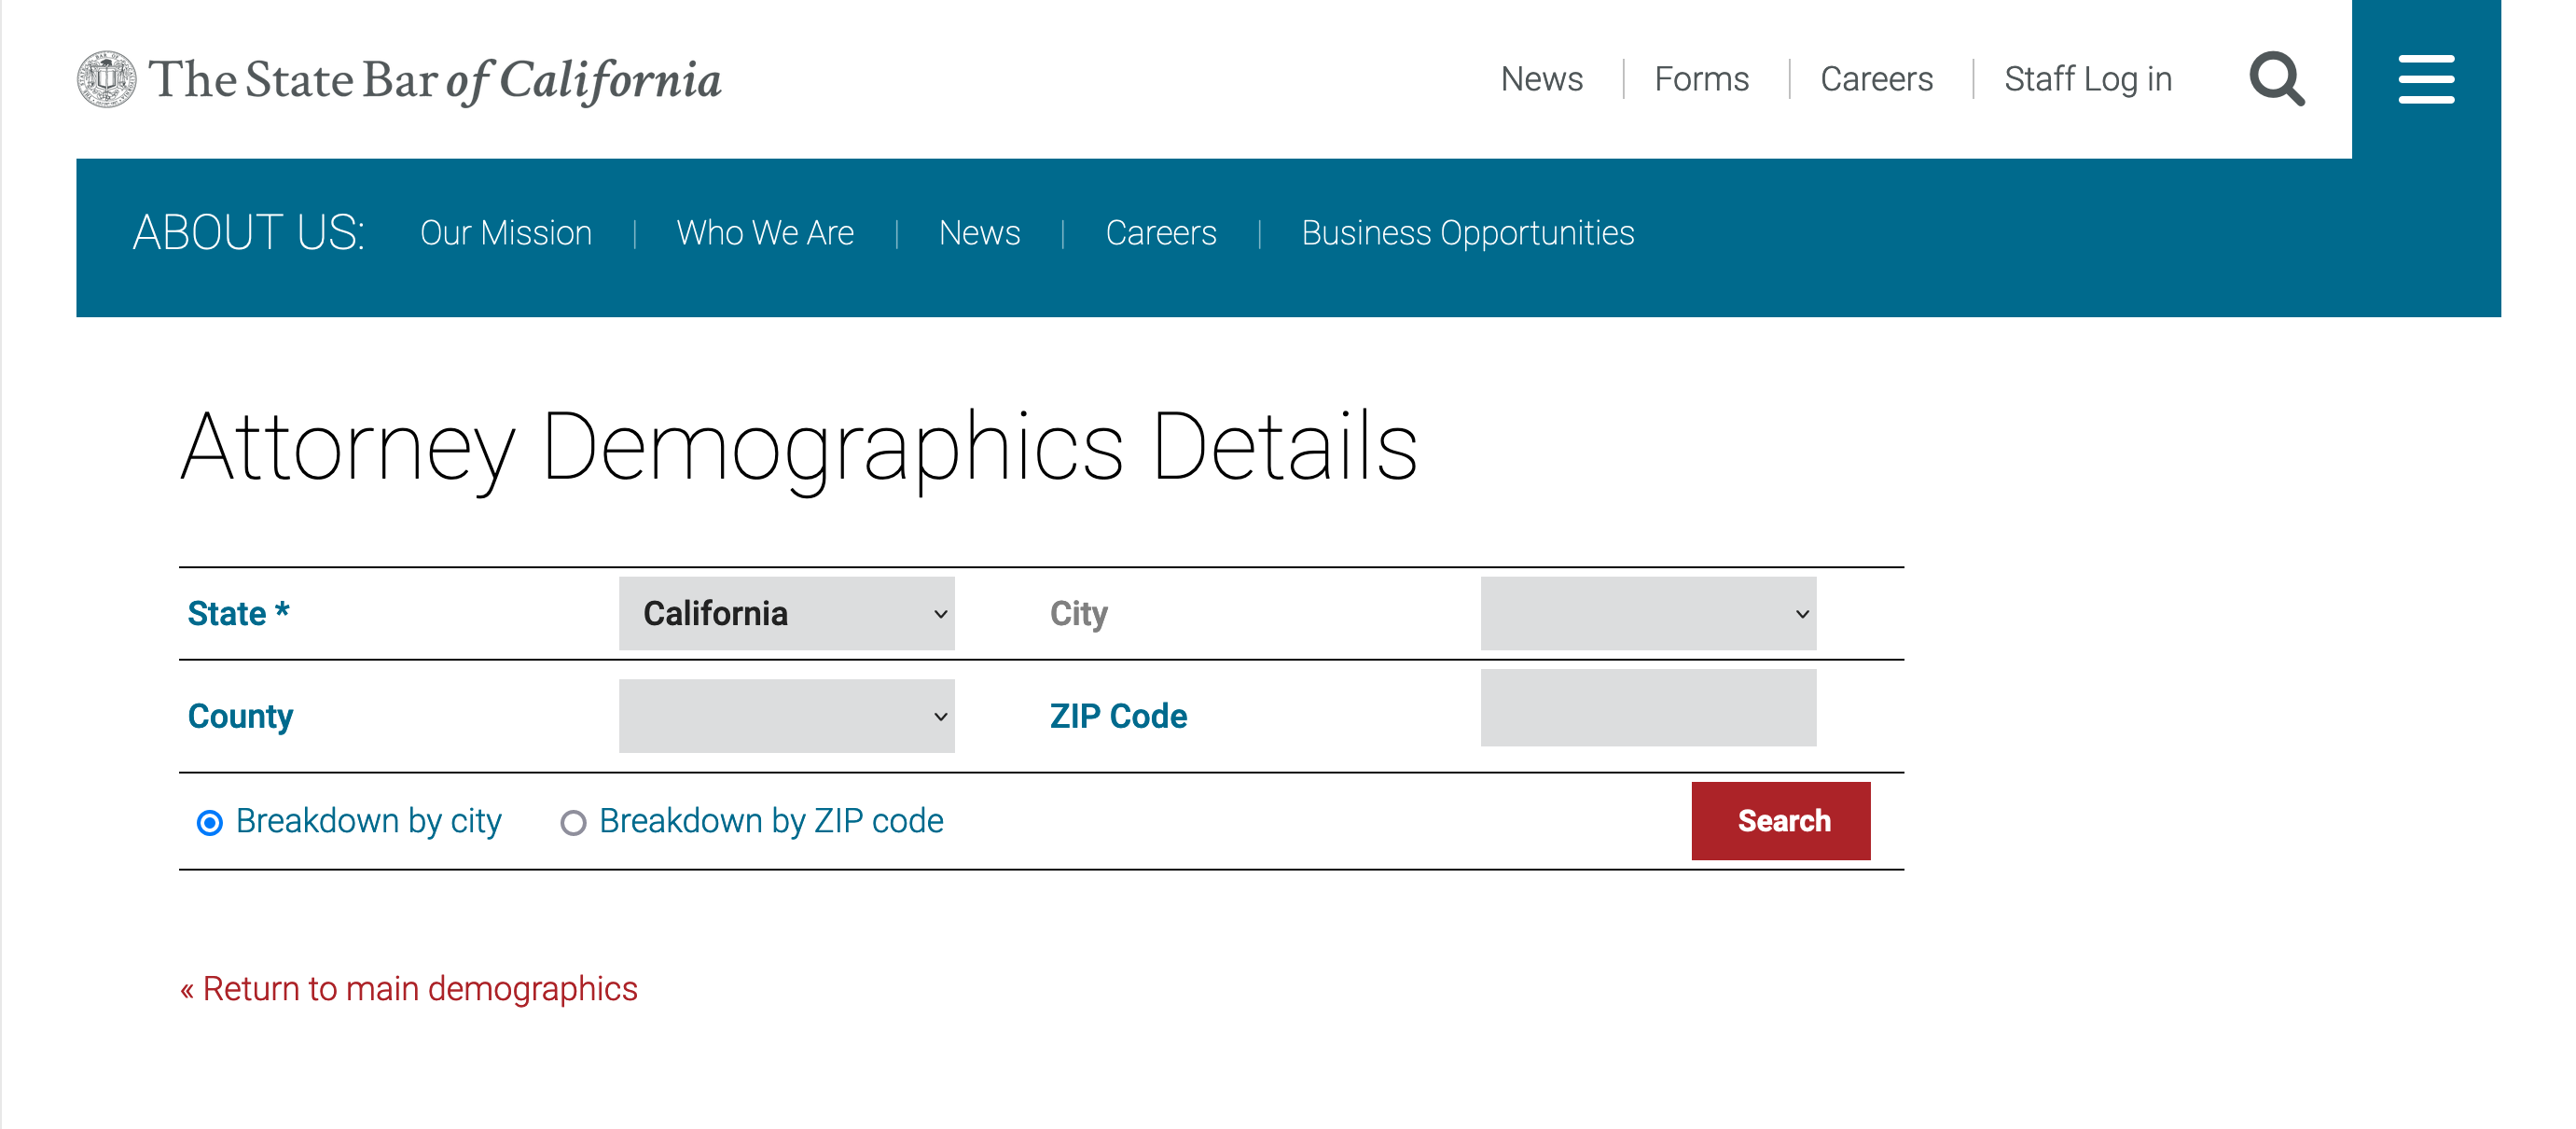

From this page, we'll extract all the zip codes to be used in Part 2 of this tutorial. We need to select "San Diego" from the "County" dropdown menu, as shown below.

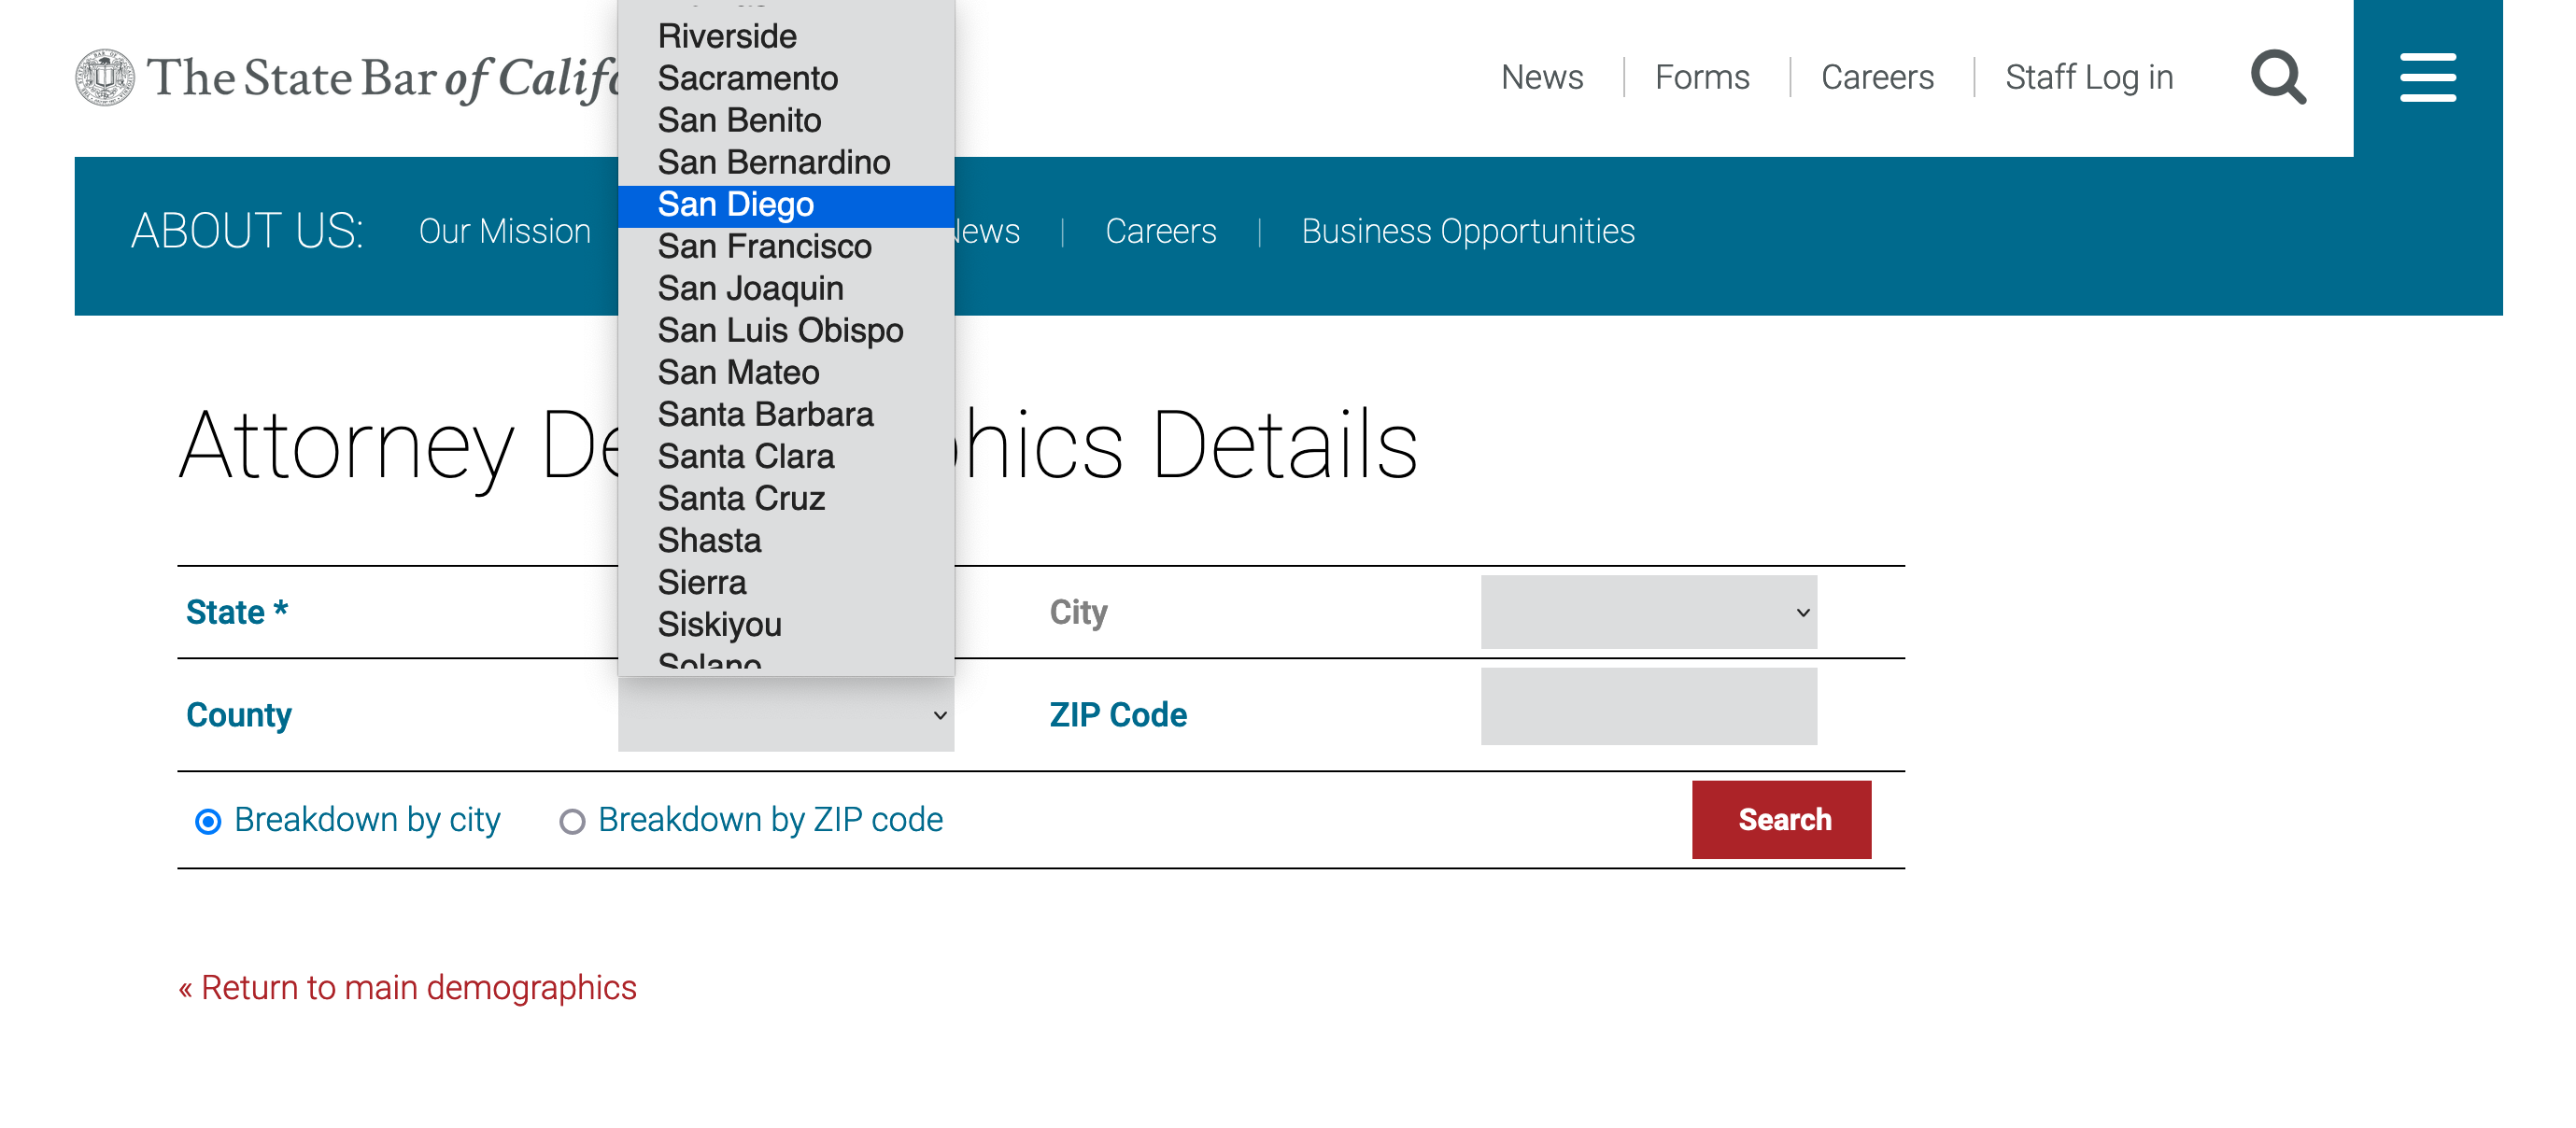

We need to inspect the "County" dropdown menu, the "Breakdown by ZIP code" element, and the "Search" button to see how we can manipulate these in Selenium.

Let's instantiate the driver and sleep for 5 seconds to give the page time to load.

In [ ]:
url = "https://apps.calbar.ca.gov/members/demographics_search.aspx"

driver = browser()
driver.get(url)
time.sleep(5)

Now we will select the option for San Diego county from the dropdown menu. Each option is numbered in the dynamically-rendered HTML.

In [ ]:
dropdown = Select(driver.find_element(By.ID, "ddlCounty"))
time.sleep(1)
dropdown.select_by_index(19)
time.sleep(1)
select_zip_code = driver.find_element(By.ID, "rbZipCode")
select_zip_code.click()
time.sleep(3)
submit = driver.find_element(By.ID, "btnSubmit")
submit.click()
time.sleep(30)

tables = pd.read_html(driver.page_source)
df = tables[1]
print(df.head())
print(df.tail())
print(len(df))

df.to_csv("city-list-la-county-2.csv")

driver.quit()

The search results take a while to load, so we need to sleep for 30 seconds so that Selenium can detect the results. Otherwise, it will throw an "element not found" error.